In [87]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [88]:
#ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from numpy import median
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import matplotlib.lines as mlines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import os
%matplotlib inline

In [89]:
#load dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
# Pre processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [91]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [92]:
# Categorical data points exploration
# Gender, Geography are the useful data points, where as surname is of no significance for the model.
data.groupby("Gender")["Geography"].count()

Gender
Female    4543
Male      5457
Name: Geography, dtype: int64

In [93]:
data.groupby("Geography")["Gender"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Gender, dtype: int64

In [94]:
data["Gender1"] = data["Gender"]
data["Gender"] = pd.Categorical(data["Gender"])
data["Gender"] = data["Gender"].cat.codes
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,Female
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Female
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Female
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,Female
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Female


In [95]:
data["Geography1"] = data["Geography"]
data["Geography"] = pd.Categorical(data["Geography"])
data["Geography"] = data["Geography"].cat.codes
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain


In [96]:
# Copy Dataset for creating models
data1 = data.copy() 
data1 = data1.drop(["CustomerId"], axis=1)
data1 = data1.drop(["Surname"], axis=1)
data1 = data1.drop(["RowNumber"], axis=1)
data1 = data1.drop(["Gender1"], axis=1)
data1 = data1.drop(["Geography1"], axis=1)
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [97]:
# Age binning
data["AgeBin"] = pd.cut(data['Age'], [0, 16, 32,48,64,500])
data["AgeBin"] = pd.Categorical(data["AgeBin"])
data["AgeBin"] = data["AgeBin"].cat.codes
data.loc[data["Age"] > 60].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin
42,43,15687946,Osborne,556,0,0,61,2,117419.35,1,1,1,94153.83,0,Female,France,3
44,45,15684171,Bianchi,660,2,0,61,5,155931.11,1,1,1,158338.39,0,Female,Spain,3
58,59,15623944,T'ien,511,2,0,66,4,0.00,1,1,0,1643.11,1,Female,Spain,4
85,86,15805254,Ndukaku,652,2,0,75,10,0.00,2,1,1,114675.75,0,Female,Spain,4
104,105,15804919,Dunbabin,670,2,0,65,1,0.00,1,1,1,177655.68,1,Female,Spain,4


In [98]:
# Binning credit score
data['CreditScoreBin'] = pd.cut(data['CreditScore'], [0, 450, 550,650,750,900])

data["CreditScoreBin"] = pd.Categorical(data["CreditScoreBin"])
data["CreditScoreBin"] = data["CreditScoreBin"].cat.codes
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4


In [99]:
# Binning Balance
data['BalanceBin'] = pd.cut(data['Balance'], [-1, 50000, 100000,150000,200000,1000000000000000])

data["BalanceBin"] = pd.Categorical(data["BalanceBin"])
data["BalanceBin"] = data["BalanceBin"].cat.codes
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2


In [100]:
# Binning Estimated Salary
data['EstimatedSalaryBin'] = pd.cut(data['EstimatedSalary'], [-1, 50000, 100000,150000,200000,1000000000000000])

data["EstimatedSalaryBin"] = pd.Categorical(data["EstimatedSalaryBin"])
data["EstimatedSalaryBin"] = data["EstimatedSalaryBin"].cat.codes
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2,1


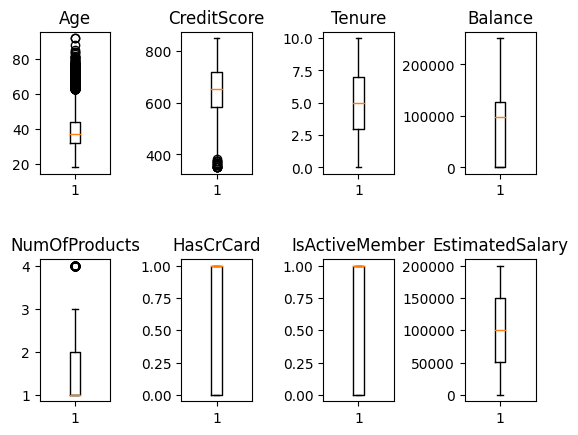

In [101]:
# Exploratory Analysis
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(data["Age"])
b.set_title("CreditScore")
b.boxplot(data["CreditScore"])
c.set_title("Tenure")
c.boxplot(data["Tenure"])
d.set_title("Balance")
d.boxplot(data["Balance"])
e.set_title("NumOfProducts")
e.boxplot(data["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(data["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(data["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(data["EstimatedSalary"])
plt.show()

In [102]:
# Correlation
data.corr()["Exited"]

C:\Users\TUF\AppData\Local\Temp\ipykernel_14148\3769916236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Exited"]


RowNumber            -0.016571
CustomerId           -0.006248
CreditScore          -0.027094
Geography             0.035943
Gender               -0.106512
Age                   0.285323
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.047820
HasCrCard            -0.007138
IsActiveMember       -0.156128
EstimatedSalary       0.012097
Exited                1.000000
AgeBin                0.256200
CreditScoreBin       -0.031312
BalanceBin            0.117289
EstimatedSalaryBin    0.013660
Name: Exited, dtype: float64

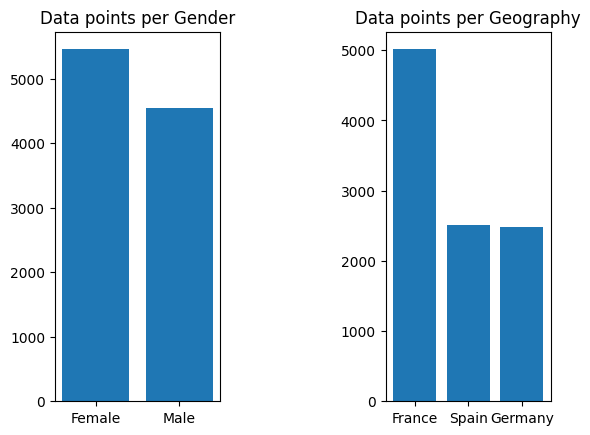

In [103]:
fig, ((a,b)) = plt.subplots(1,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
a.set_title("Data points per Gender")
a.bar(data["Gender1"].unique(),data.iloc[:,14].value_counts())
b.set_title("Data points per Geography")
b.bar(data["Geography1"].unique(),data.iloc[:,15].value_counts())
plt.show()

In [104]:
# Remove the non-necessary fields
data = data.drop(["CustomerId"], axis=1)
data = data.drop(["Gender1"], axis=1)
data = data.drop(["Geography1"], axis=1)
data = data.drop(["Age"], axis=1)
data = data.drop(["CreditScore"], axis=1)
data = data.drop(["Balance"], axis=1)
data = data.drop(["EstimatedSalary"], axis=1)
data = data.drop(["Surname"], axis=1)
data = data.drop(["RowNumber"], axis=1)

In [105]:
# Random shuffle of records 
dataset = data.sample(frac=1).reset_index(drop=True)

In [106]:
# Split data into train and test datasets
test_data_split = 0.2
x_train,x_test , y_train, y_test = train_test_split(data.drop(["Exited"],axis=1),data["Exited"],test_size = test_data_split)
x_test.describe()
# Split data into train and test datasets for decision tree
x_train_dt,x_test_dt , y_train_dt, y_test_dt = train_test_split(data1.drop(["Exited"],axis=1),data1["Exited"],test_size = test_data_split)

In [107]:
# feature importance analysis
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
d = {'columnName': x_train.columns.values, 'featureScore': fit.scores_}
df = pd.DataFrame(data=d)
df.sort_values(['featureScore'], ascending=False)

[ 10.538  44.664   3.54    4.656   0.227  85.685 133.527   2.211 101.594
   3.111]


,columnName,featureScore
6,AgeBin,133.527354
8,BalanceBin,101.594139
5,IsActiveMember,85.685426
1,Gender,44.664487
0,Geography,10.537552
3,NumOfProducts,4.655732
2,Tenure,3.540126
9,EstimatedSalaryBin,3.111221
7,CreditScoreBin,2.210693
4,HasCrCard,0.226892


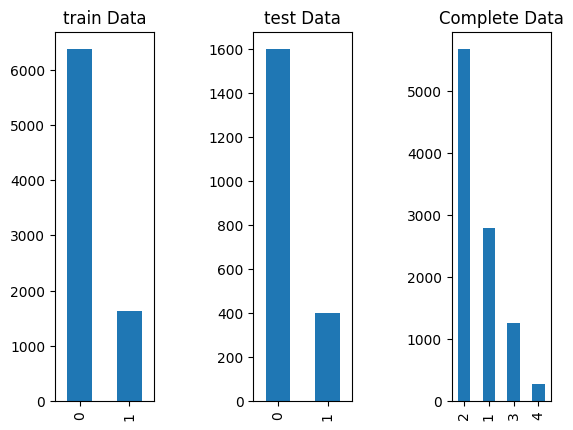

In [108]:
# Check the distribution of Exited in train & Test datasets
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
plt.subplot(1,3,1)
y_train.iloc[:].value_counts().plot(kind = 'bar',title="train Data")
plt.subplot(1,3,2)
y_test.iloc[:].value_counts().plot(kind = 'bar',title="test Data")
plt.subplot(1,3,3)
dataset.iloc[:,7].value_counts().plot(kind = 'bar',title="Complete Data")
plt.show()

In [109]:
# Build model
# Logistic Regression

logreg = LogisticRegression(penalty = 'l2', C = 0.1,random_state = 0)
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=0)

In [110]:
# Prediction
y_pred = logreg.predict(x_test)

In [111]:
# Accuracy metrics
acc_log = round(logreg.score(x_test, y_test), 3)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.814


array([[1570,   29],
       [ 343,   58]], dtype=int64)

In [112]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(1570, 29, 343, 58)

0.7638993510594996


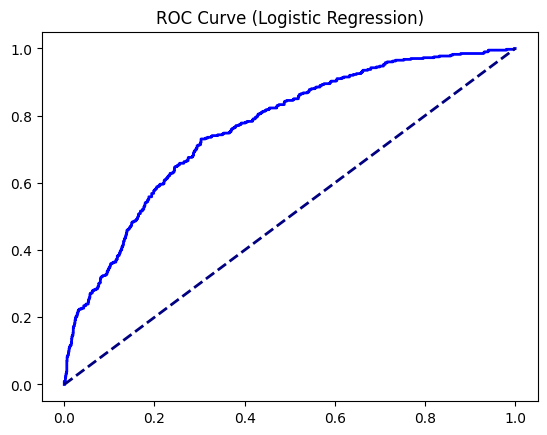

In [113]:
# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title("ROC Curve (Logistic Regression)")
plt.plot(fpr, tpr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [118]:
import pickle
Pkl_Filename = "Churn_Modelling2.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [119]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

LogisticRegression(C=0.1, random_state=0)